In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
#Load the dataset
df = pd.read_csv('dataset-of-00s.csv')
#Print the first 5 rows of the dataframe.
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [ ]:
df.drop(['track','artist','uri','speechiness','liveness'],axis=1)

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.578,0.4710,4,-7.270,1,0.368000,0.000000,0.532,133.061,196707,4,30.88059,13,1
1,0.704,0.8540,10,-5.477,0,0.018500,0.000000,0.688,92.988,242587,4,41.51106,10,1
2,0.162,0.8360,9,-3.009,1,0.000111,0.004570,0.300,86.964,338893,4,65.32887,13,0
3,0.188,0.9940,4,-3.745,1,0.000007,0.078400,0.333,148.440,255667,4,58.59528,9,0
4,0.630,0.7640,2,-4.353,1,0.363000,0.000000,0.631,112.098,193760,4,22.62384,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,0.667,0.6270,6,-10.488,0,0.097200,0.000052,0.784,186.081,232560,4,40.87045,10,1
5868,0.691,0.3890,6,-10.125,1,0.255000,0.000000,0.437,122.219,233840,4,81.77735,7,1
5869,0.297,0.0773,2,-23.839,1,0.951000,0.000217,0.401,75.916,275560,4,37.51903,11,0
5870,0.390,0.6010,7,-8.236,0,0.031300,0.947000,0.439,116.122,223627,4,39.84092,11,0


In [ ]:
df.shape

(5872, 19)

In [ ]:
X = df.drop(['track','artist','uri','speechiness','liveness','target'],axis=1).values
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,stratify=y,random_state=42)

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test,y_test)
    

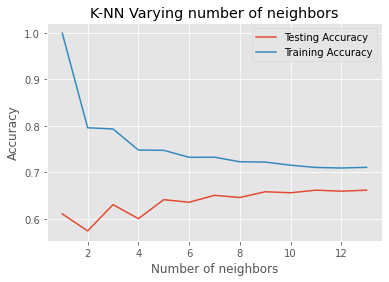

In [ ]:
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN Varying number of neighbors')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
knn.score(X_test,y_test)

NotFittedError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[731, 444],
       [356, 818]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.65      1175
           1       0.65      0.70      0.67      1174

    accuracy                           0.66      2349
   macro avg       0.66      0.66      0.66      2349
weighted avg       0.66      0.66      0.66      2349



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

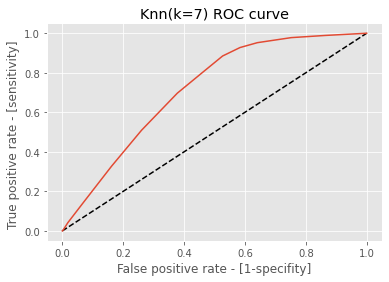

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('False positive rate - [1-specifity]')
plt.ylabel('True positive rate - [sensitivity] ')
plt.title('Knn(k=7) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7146935372793505

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.684433796078147

In [ ]:
knn_cv.best_params_

{'n_neighbors': 46}